#  Portfolio Mathematik 6a von Samriddhi Singh
## **Thema: Traveling-Salesman-Problem (TSP)**
<img src="w1dwba8my3j01.png" style="width:800px;">


---

## Problemdefinition

Das **Traveling-Salesman-Problem (TSP)** ist ein klassisches Problem der kombinatorischen Optimierung.  
Gegeben ist eine Anzahl von Städten sowie die Entfernungen zwischen allen möglichen Städtenpaaren.

**Ziel:**  
Finde eine möglichst kurze Rundreise, die:

- in einer beliebigen Stadt startet,  
- jede Stadt **genau einmal** besucht,  
- und wieder am Startpunkt endet.

---

## Annahmen:

### 1. **Symmetrie**

Die Entfernung von Stadt A nach Stadt B ist gleich der Entfernung von B nach A:

$$
d(i, j) = d(j, i) \quad \forall \, i, j
$$


### 2. **Dreiecksungleichung**

Der direkte Weg zwischen zwei Städten ist niemals länger als ein Umweg über eine dritte Stadt:

$$
d(i, j) \leq d(i, k) + d(k, j) \quad \forall \, i, j, k
$$


### 3. **Statischer Graph**

- Die Entfernungen zwischen den Städten ändern sich während der Berechnung nicht.
- Der Graph ist statisch, d. h., die Distanzen sind konstant.



### 4. **Keine Doppelbesuche**

Jede Stadt wird nur einmal besucht, ausser zur Rückkehr zum Startpunkt.


### 5. **Endliche Anzahl Städte**

Die Anzahl der Städte ist endlich und wird mit **n** bezeichnet.


---

# Relevanz des Problems  

Das **Travelling Salesman Problem (TSP)** ist kein schwer verständliches Problem, aber es ist äusserst schwer, es effizient zu lösen.

Eine naive Methode, das sogenannte **Brute-Force-Verfahren**, werden wir später noch betrachten. Dabei muss man alle möglichen Rundreisen durch $ n $ Städte prüfen, um die optimale Route zu finden. Die Anzahl der möglichen Routen beträgt:

$$
\frac{(n - 1)!}{2}
$$

Diese Anzahl wächst extrem schnell mit steigender Anzahl an Städten. Schon bei relativ kleinen Werten für $ n $ wird das Rechnen unpraktisch oder sogar unmöglich.

Da es bisher keinen effizienten Algorithmus gibt, der garantiert die beste Lösung in akzeptabler Zeit findet, begnügt man sich in der Praxis mit **Heuristiken** und **approximativen Algorithmen**, die eine **"gut genug"** Lösung liefern.

## Reale Anwendungen

Das TSP hat viele praktische Anwendungen:

### 1. Logistik und Lieferdienste

Wie der Name schon andeutet, ist das TSP zentral für **Routenoptimierung in der Logistik**, z. B. bei Paketdiensten:

- [TomTom: Anwendung in der Logistik](https://developer.tomtom.com/blog/build-different/how-solve-traveling-salesman-problem-logistics/)
- [Google Maps-basierter TSP-Solver auf GitHub](https://github.com/muyangye/Traveling_Salesman_Solver_Google_Maps)

### 2. Astronomie

Bei der Planung von **Teleskopbewegungen** hilft das TSP, die Gesamtbewegung zu minimieren:

- [Teleskopoptimierung (PDF)](https://www.princeton.edu/~ekolemen/publications/kolemen_gnc_feb_2007_breckenridge.pdf)

### 3. DNA-Seqünzierung

Auch in der **Bioinformatik** wird das TSP genutzt, um die kürzeste Tour durch DNA-Fragmente zu berechnen:

- [Anwendung in der DNA-Analyse](https://journals.stmjournals.com/ijbcb/article=2024/view=183905/)

## Bezug zum P-vs-NP-Problem

Das TSP ist auch in der theoretischen Informatik von zentraler Bedeutung, da es eng mit dem berühmten **P-vs-NP-Problem** verknüpft ist.

> Das P-vs-NP-Problem fragt, ob jede Aufgabe, deren Lösung sich in polynomialer Zeit("einfach") verifizieren lässt, auch in polynomialer Zeit ("einfach") gelöst werden kann.

Das TSP wird häufig als **Beispielproblem** herangezogen, wenn es um die Klassen **NP**, **NP-hart** und **NP-vollständig** geht.

### Begriffsdefinitionen:

- Ein Problem ist in **NP**, wenn eine gegebene Lösung in **polynomialer Zeit überprüft** werden kann.
- Ein Problem ist **NP-hart**, wenn es mindestens so schwer ist wie jedes Problem in NP (aber nicht notwendigerweise in NP selbst liegt).
- **NP-vollständig** bedeutet: Das Problem ist **sowohl in NP** als auch **NP-hart**.

### Gilt das für das TSP?

Beim TSP gibt es einen entscheidenden Punkt:

Um zu überprüfen, ob eine vorgeschlagene Tour optimal ist, muss man zwei Dinge kontrollieren:

1. Jede Stadt wird genau einmal besucht.
2. Es gibt **keine kürzere Tour** als die vorgeschlagene.

Das erste lässt sich in polynomialer Zeit prüfen. Das zweite hingegen ist nicht effizient prüfbar.

**Daher gilt:**

- Das **Optimierungsproblem** des TSP (die beste Route finden) ist **NP-hart**.
- Das **Entscheidungsproblem** (gibt es eine Route kürzer als ein gegebener Wert?) ist **NP-vollständig**.


Obwohl das TSP ein scheinbar einfaches Problem ist, bleibt es **rechnerisch extrem anspruchsvoll**. Es steht exemplarisch für viele reale Herausforderungen, bei denen Optimierung unter Zeitdruck gefragt ist und es ist ein zentrales Problem in der Komplexitätstheorie.




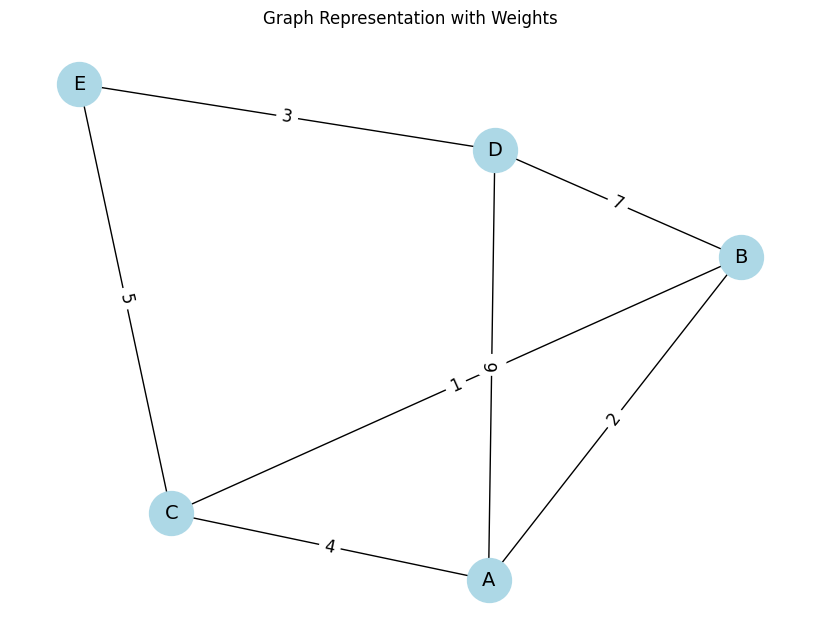

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


V = ['A', 'B', 'C', 'D', 'E']
E = [('A', 'B', 2), ('A', 'C', 4), ('B', 'C', 1), ('C', 'E', 5), ('B', 'D', 7), ('D', 'E', 3), ('A', 'D', 6)]


G = nx.Graph()
G.add_weighted_edges_from(E)


pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=14)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.title("Graph Representation with Weights")
plt.show()





adj_list = {node: [] for node in V}
for u, v, w in E:
    adj_list[u].append((v, w))
    adj_list[v].append((u, w))  


adj_list_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in adj_list.items()]))



## Grundlagen der Graphentheorie

Im Kontext des **Traveling Salesman Problems (TSP)** liefert die Graphentheorie die grundlegenden Werkzeuge und Begriffe, die notwendig sind, um das Problem zu modellieren und zu lösen.

Ein **Graph** ist eine mathematische Struktur, die verwendet wird, um Paarbeziehungen zwischen Objekten darzustellen. Er besteht aus zwei Hauptkomponenten:

Ein Graph wird typischerweise wie folgt dargestellt:
$
G = (V, E)
$

wobei:
- $V$ die Menge der **Knoten** (auch **Ecken** genannt) ist,
- $E$ die Menge der **Kanten** ist, die die Knoten miteinander verbinden.

---

### Beispiel

Knoten:
$
V = {A, B, C, D, E}
$

Diese repräsentieren Orte oder Städte.

Kanten mit Gewicht (ungerichteter Graph):

$
E = {(A, B, 2), (A, C, 4), (B, C, 1), (C, E, 5), (B, D, 7), (D, E, 3), (A, D, 6)}
$

Jede Kante hat ein Gewicht, das beispielsweise eine Entfernung, einen Kostenfaktor oder eine Zeit zwischen den Knoten darstellen kann.

---

### Gerichtete vs. Ungerichtete Graphen

- In einem **ungerichteten Graphen** haben die Kanten keine Richtung. Eine Kante $(u, v)$ bedeutet auch $(v, u)$.
- In einem **gerichteten Graphen (Digraph)** haben die Kanten eine feste Richtung: $(u, v) ≠ (v, u)$.

**Symmetrisches TSP** nutzt ungerichtete Graphen (Strecke A→B ist gleich B→A),  
**Asymmetrisches TSP (ATSP)** nutzt gerichtete Graphen (z. B. Einbahnstrassen oder Flugrouten).

---

### Adjazenzmatrix

Die Adjazenzmatrix ist eine quadratische Matrix, bei der:
- Die Zeilen und Spalten die Knoten repräsentieren,
- Jede Zelle $(i, j)$ das Gewicht der Kante vom Knoten $i$ zum Knoten $j$ enthält,
- Ein Wert von 0 bedeutet, dass keine direkte Verbindung besteht.

Für den Beispielgraphen ergibt sich folgende Adjazenzmatrix:

|     | A | B | C | D | E |
|-----|---|---|---|---|---|
| A   | 0 | 2 | 4 | 6 | 0 |
| B   | 2 | 0 | 1 | 7 | 0 |
| C   | 4 | 1 | 0 | 0 | 5 |
| D   | 6 | 7 | 0 | 0 | 3 |
| E   | 0 | 0 | 5 | 3 | 0 |



---

### Adjazenzliste

Eine **Adjazenzliste** ist eine kompaktere Darstellung eines Graphen:
- Jeder Knoten zeigt auf eine Liste von benachbarten Knoten und den entsprechenden Kantengewichten.

Für den Beispielgraphen:

```
A → B (2), C (4), D (6)
B → A (2), C (1), D (7)
C → A (4), B (1), E (5)
D → A (6), B (7), E (3)
E → C (5), D (3)
```

---

### Hamiltonpfad und Hamiltonkreis

- Ein **Hamiltonpfad** ist ein Pfad, der jeden Knoten im Graphen **genau einmal** besucht.
- Ein **Hamiltonkreis** (auch **Hamilton-Tour**) ist ein geschlossener Hamiltonpfad. Er beginnt und endet im gleichen Knoten.

---

### Aufspannbaum (Spanning Tree)

Ein **Spanning Tree** eines Graphen ist ein Teilgraph, der:
- alle Knoten enthält,
- zusammenhängend ist (es gibt einen Pfad zwischen jedem Knoten),
- keine Zyklen enthält,
- genau $|V| - 1$ Kanten besitzt.

Ein **Minimaler Aufspannbaum (MST)** ist der Spanning Tree mit dem geringsten Gesamtkantengewicht.  
Der **Christofides-Algorithmus** nutzt MSTs als Zwischenschritt zur Näherung des TSP.

---

### Eulerkreis vs. Hamiltonkreis

- Ein **Eulerkreis** ist ein geschlossener Pfad, der **jede Kante genau einmal** durchläuft (Knoten dürfen mehrfach vorkommen).
- Ein **Hamiltonkreis** durchläuft **jeden Knoten genau einmal** (Kanten dürfen mehrfach auftreten).

Für das TSP ist der **Hamiltonkreis** zentral, nicht der Eulerkreis.


## Big-O-Notation (Ein Überblick)

Um die Leistung verschiedener Lösungen für das **Travelling-Salesman-Problem (TSP)** zu bewerten, müssen wir zwei Hauptaspekte betrachten:

1. **Wie genau und optimal** die Algorithmen bei der Suche nach der kürzesten Route sind.  
2. **Wie effizient** sie in Bezug auf Rechenzeit und Ressourcen sind.

Um den zweiten Aspekt die Effizienz zu analysieren, verwenden wir die **Big-O-Notation**, mit der man beschreibt und vergleicht, wie die Laufzeit eines Algorithmus mit zunehmender Problemgröße wächst.

---

### Was ist die Big-O-Notation?

Die **Big-O-Notation** beschreibt, wie der Zeit- oder Speicherbedarf eines Algorithmus im Verhältnis zur Eingabegrösse $n$ wächst.  
Sie wird in der **asymptotischen Analyse** verwendet, um eine **Worst-Case-Abschätzung** zu liefern  unabhängig von konkreter Hardware oder Implementierung.

---

### O(n): Lineare Laufzeit

**Definition:**  
Ein Algorithmus hat eine **lineare Laufzeit**, wenn die Anzahl der Schritte proportional zur Eingabegrösse wächst.

**Beispiel:**
```python
def print_items(items):
    for item in items:
        print(item)
```
Wenn `items` enthält:

- 10 Elemente → ca. 10 Operationen  
- 1.000 Elemente → ca. 1.000 Operationen  

Dies wird als **O(n)** bezeichnet.

---

### O(1): Konstante Laufzeit

**Definition:**  
Ein Algorithmus hat eine konstante Laufzeit, wenn die Anzahl der Schritte unabhängig von der Eingabegrösse ist.

**Beispiel:**

```python
def access_element(arr, index):
    return arr[index]
```

Auch bei einer Liste mit 1 oder 1.000.000 Elementen, der Zugriff auf ein einzelnes Element dauert immer gleich lang: **O(1)**.

---

### O(n²): Quadratische Laufzeit

**Definition:**  
Ein Algorithmus hat eine quadratische Laufzeit, wenn die Anzahl der Schritte mit dem Quadrat der Eingabegrösse wächst. Dies tritt häufig bei verschachtelten Schleifen auf.

**Beispiel:**
```python
def print_pairs(arr):
    for i in arr:
        for j in arr:
            print(i, j)
```
Die Anzahl der Operationen wächst quadratisch mit der Eingabegrösse:

- Bei 10 Elementen → 100 Operationen  
- Bei 1.000 Elementen → 1.000.000 Operationen  

Dies wird als **O(n²)** bezeichnet.

---

### O(n!): Fakultät-Laufzeit

**Definition:**  
Ein Algorithmus mit der Zeitkomplexität **O(n!)** bedeutet, dass die Anzahl der Operationen fakultativ mit der Eingabegrösse **n** wächst:

$$
O(n!) = n \times (n-1) \times (n-2) \times \dots \times 2 \times 1
$$

Selbst kleine Erhöhungen der Eingabegrösse führen zu einer drastischen Zunahme der Berechnungszeit.

---

### Bedeutung der Big-O-Notation

Die **Big-O-Notation** beschreibt, wie schnell der Laufzeitbedarf eines Algorithmus im Verhältnis zur Eingabegrösse wächst.  
Wichtig zu beachten ist, dass es hierbei um **Wachstumsraten** und nicht um exakte Zeiten geht.

In der asymptotischen Analyse liegt der Fokus nicht auf der tatsächlichen Ausführungszeit eines Algorithmus, sondern darauf, wie schnell der Algorithmus bei steigender Eingabegrösse langsamer wird.

**Beispiel:**  
Wenn ein Algorithmus eine Komplexität von **O(2^{(n-1)})** hat, dann ist dies ebenfalls **O(n!)**, da konstante Faktoren und niedrigere Terme in der Big-O-Notation ignoriert werden.


In [5]:
#import stuff
import functools
import itertools
import pathlib
import random
import time  
import math
import re
import matplotlib.pyplot as plt      
from IPython.display import HTML
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [6]:
#makes sure stuff gets rendered
%matplotlib inline

## Lösungsansätze

### Einige Lösungsansätze vorstellen

#### Brute Force

Mit **Brute Force** geht man jede mögliche Kombination durch und prüft, welche Kombination am kürzesten bzw. optimalsten ist. 

Dies ist eine sehr teure Methode, um das Problem zu lösen, mit einer Zeitkomplexität von $ O(n!) $. Genauer gesagt, ist die Anzahl aller möglichen **Hamiltonkreise** bei einem vollständigen, symmetrischen Graphen mit $ n $ Knoten:

$$
\frac{(n-1)!}{2}
$$

Das bedeutet:
- Man wählt einen beliebigen Startknoten (da der Zyklus geschlossen ist, spielt der Startpunkt keine Rolle),
- Permutiert die verbleibenden $ n-1 $ Knoten,
- Und teilt durch 2, weil der Zyklus in umgekehrter Richtung gleich ist.

##### Beispielhafte Anzahl möglicher Hamiltonkreise:

| n   | $\frac{(n-1)!}{2}$ mögliche Zyklen |
|-----|-------------------------------------|
| 3   | 1                                   |
| 4   | 3                                   |
| 5   | 12                                  |
| 6   | 60                                  |
| 7   | 360                                 |
| 8   | 2,520                               |
| 9   | 20,160                              |
| 10  | 181,440                             |
| 20  | 6.08226 × 10¹⁶                      |
| 30  | 4.42088 × 10³⁰                      |
| 40  | 1.01989 × 10⁴⁶                      |

Je grösser $ n $, desto schneller wächst die Anzahl der möglichen Lösungen exponentiell an was Brute Force für grosse Graphen **praktisch unbrauchbar** macht.


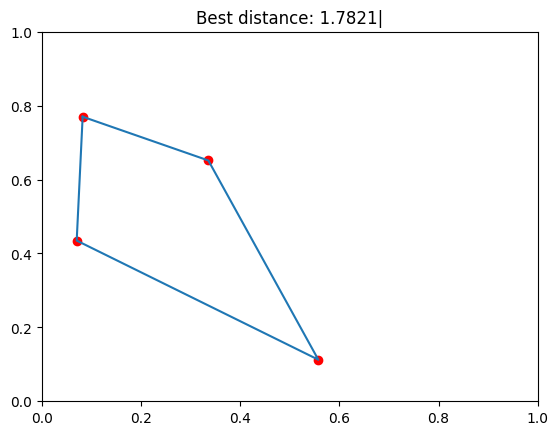

In [7]:
N = 4

cities = np.random.rand(N, 2)

def total_distance(path):
    return sum(np.linalg.norm(cities[path[i]] - cities[path[i+1]]) for i in range(len(path)-1)) + np.linalg.norm(cities[path[-1]] - cities[path[0]])

all_tours = [ (0,) + p for p in itertools.permutations(range(1, N)) if p[0] < p[-1] ]

fig, ax = plt.subplots()
scat = ax.scatter(cities[:, 0], cities[:, 1], c='red')

line, = ax.plot([], [], 'b-', lw=2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

best_path = []
best_dist = float('inf')

def update(frame):

    global best_path, best_dist
    path = all_tours[frame]
    dist = total_distance(path)

    if dist < best_dist:

        best_path = path
        best_dist = dist

    path_coords = cities[list(path) + [path[0]]]
    line.set_data(path_coords[:, 0], path_coords[:, 1])
    ax.set_title(f"Path {frame+1}/{len(all_tours)}  | Current: {dist:.4f}")
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(all_tours), interval=300, repeat=False)
plt.close(fig)


display(HTML(ani.to_html5_video()))

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

    


ax.set_title(f"Best distance: {best_dist:.4f}|")
path_coords = np.vstack([cities[list(best_path) + [best_path[0]]]])
ax.scatter(cities[:, 0], cities[:, 1], c='red')
ax.plot(path_coords[:, 0], path_coords[:, 1])




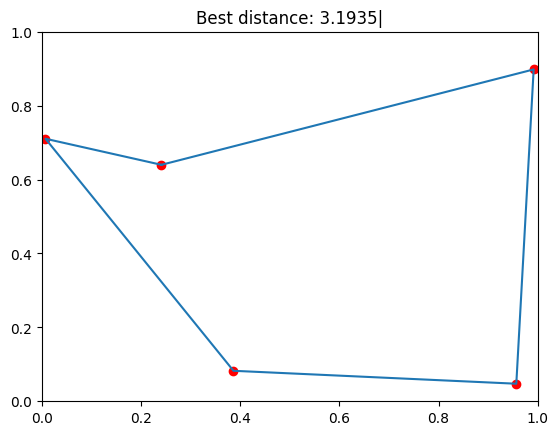

In [8]:
N = 5

cities = np.random.rand(N, 2)

def total_distance(path):
    return sum(np.linalg.norm(cities[path[i]] - cities[path[i+1]]) for i in range(len(path)-1)) + np.linalg.norm(cities[path[-1]] - cities[path[0]])

all_tours = [ (0,) + p for p in itertools.permutations(range(1, N)) if p[0] < p[-1] ]

fig, ax = plt.subplots()
scat = ax.scatter(cities[:, 0], cities[:, 1], c='red')
line, = ax.plot([], [], 'b-', lw=2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

best_path = []
best_dist = float('inf')

def update(frame):
    global best_path, best_dist
    path = all_tours[frame]
    dist = total_distance(path)
    if dist < best_dist:
        best_path = path
        best_dist = dist
    path_coords = cities[list(path) + [path[0]]]
    line.set_data(path_coords[:, 0], path_coords[:, 1])
    ax.set_title(f"Path {frame+1}/{len(all_tours)}  | Current: {dist:.4f}")
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(all_tours), interval=300, repeat=False)
plt.close(fig)


display(HTML(ani.to_html5_video()))
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

    

ax.set_title(f"Best distance: {best_dist:.4f}|")
path_coords = np.vstack([cities[list(best_path) + [best_path[0]]]])
ax.scatter(cities[:, 0], cities[:, 1], c='red')
ax.plot(path_coords[:, 0], path_coords[:, 1])




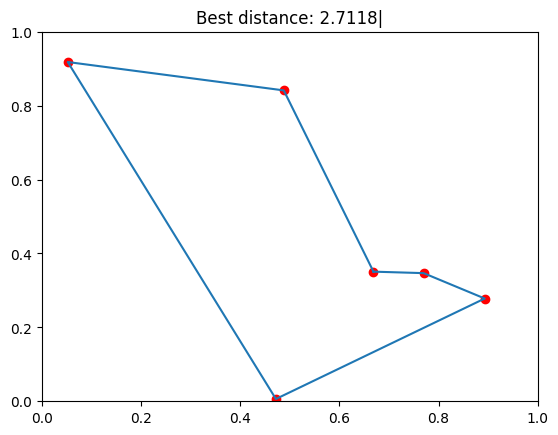

In [9]:
N = 6
np.random.seed(404)
cities = np.random.rand(N, 2)

def total_distance(path):
    return sum(np.linalg.norm(cities[path[i]] - cities[path[i+1]]) for i in range(len(path)-1)) + np.linalg.norm(cities[path[-1]] - cities[path[0]])

all_tours = [ (0,) + p for p in itertools.permutations(range(1, N)) if p[0] < p[-1] ]

fig, ax = plt.subplots()
scat = ax.scatter(cities[:, 0], cities[:, 1], c='red')
line, = ax.plot([], [], 'b-', lw=2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

best_path = []
best_dist = float('inf')

def update(frame):
    global best_path, best_dist
    path = all_tours[frame]
    dist = total_distance(path)
    if dist < best_dist:
        best_path = path
        best_dist = dist
    path_coords = cities[list(path) + [path[0]]]
    line.set_data(path_coords[:, 0], path_coords[:, 1])
    ax.set_title(f"Path {frame+1}/{len(all_tours)}  | Current: {dist:.4f}")
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(all_tours), interval=300, repeat=False)
plt.close(fig)


display(HTML(ani.to_html5_video()))
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

    

ax.set_title(f"Best distance: {best_dist:.4f}|")
path_coords = np.vstack([cities[list(best_path) + [best_path[0]]]])
ax.scatter(cities[:, 0], cities[:, 1], c='red')
ax.plot(path_coords[:, 0], path_coords[:, 1])




### Nearest-Neighbor-Algorithmus

Der **Nearest-Neighbor-Algorithmus** ist ein **gieriger Algorithmus** (*Greedy Algorithmus*), was bedeutet, dass in jedem Schritt des Algorithmus die derzeit bestmögliche Kante gewählt wird. Anders gesagt: Es wird in jedem Schritt eine **lokal optimale Entscheidung** getroffen.

Ein weiterer wichtiger Punkt bei diesem Algorithmus ist, dass ein **Startknoten** gewählt werden muss. Unterschiedliche Startknoten können zu unterschiedlichen **Hamilton-Kreisen** führen, wie in den folgenden Beispielen veranschaulicht wird.

Gierige Algorithmen sind eine Klasse von Algorithmen, die in jedem Schritt **lokal optimale** Entscheidungen treffen in der Hoffnung, am Ende eine **global optimale** Lösung zu finden.

---

### Pseudocode

**Initialisierung:**

- Wähle einen Startknoten $u_i \in V(G)$  
- Erstelle einen Pfad $P = \{u_i\}$ und setze $T = V(P)$  
- Setze $r = 1$ und $v_r = u_i$  

**Iteration:**

1. Wähle $u_j \in V(G) \setminus T$, der den **minimalen Abstand** zu $v_r$ hat (bei Gleichstand beliebig entscheiden)  
2. Setze $v_{r+1} = u_j$ und aktualisiere $P = \{u_i \rightarrow u_j\}$  
3. Erhöhe $r = r + 1$ und wiederhole, bis $T = V(G)$  

**Ausgabe:**  
Ein **Hamilton-Kreis** ergibt sich, wenn der letzte Knoten im Pfad $P$ mit dem ersten Knoten verbunden wird.

---

### Zeitkomplexität (Big-O)

Die **Zeitkomplexität** des Nearest-Neighbor-Algorithmus beträgt:

- $\mathcal{O}(n^2)$ für $n$ Knoten

Dies liegt daran, dass in jedem der $n$ Schritte die verbleibenden (ungefähr $n$) Knoten überprüft werden müssen, um den nächsten Nachbarn zu finden.


In [10]:

def nearest_neighbor_animation(seed,N):
    np.random.seed(seed)
    cities = np.random.rand(N, 2)

    visited = [0]
    unvisited = set(range(1, N))
    frames = []

    while unvisited:
        last = visited[-1]
        next_city = min(unvisited, key=lambda city: np.linalg.norm(cities[city] - cities[last]))
        visited.append(next_city)
        unvisited.remove(next_city)
        frames.append(visited.copy())

    visited.append(0)
    frames.append(visited.copy())

    fig, ax = plt.subplots()
    scat = ax.scatter(cities[:, 0], cities[:, 1], c='red')
    line, = ax.plot([], [], 'b-', lw=2)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    def total_distance(path):
        return sum(np.linalg.norm(cities[path[i]] - cities[path[i+1]]) for i in range(len(path)-1))

    def update(frame):
        coords = cities[frame]
        dist = total_distance(frame)
        line.set_data(coords[:, 0], coords[:, 1])
        ax.set_title(f"Nearest Neighbor | Step {len(frame)-1}/{N} | Distance: {dist:.4f}")
        return line,

    ani = animation.FuncAnimation(fig, update, frames=frames, interval=500, repeat=False)
    plt.close(fig)
    return HTML(ani.to_html5_video())


nearest_neighbor_animation(420,6)


In [11]:

nearest_neighbor_animation(69,60)

## Gieriger Algorithmus

Dieser Algorithmus sucht eine Tour durch $N$ Städte mit möglichst kurzer Gesamtdistanz. Er liefert keine garantiert optimale Lösung, ist aber effizient und ergibt oft eine gute Näherung. Der Ablauf besteht aus drei Hauptschritten:

---

### Schritt 1: Alle Distanzen berechnen

Es werden alle möglichen Kanten zwischen den $N$ Städten erzeugt. Da jede Kante ein Paar aus zwei Städten ist, ergibt das:

$$
\binom{N}{2} = \frac{N(N-1)}{2} \in O(N^2)
$$

Jede Kante wird als Tupel $(\text{Distanz}, \text{Stadt}_1, \text{Stadt}_2)$ dargestellt.

---

### Schritt 2: Kanten nach Distanz sortieren

Die Liste der $O(N^2)$ Kanten wird nach aufsteigender Distanz sortiert. Vergleichsbasierte Sortieralgorithmen (z. B. Merge Sort) haben die Komplexität:

$$
O(M \log M)
$$

Setzt man $M = N^2$, ergibt sich:

$$
O(N^2 \log N^2)
$$

Da $\log(N^2) = 2 \log N$, folgt:

$$
O(N^2 \cdot \log N)
$$

---

### Schritt 3: Kürzeste zulässige Kanten auswählen

Man geht die sortierte Kantenliste durch und wählt Kanten aus, die:

- keine Kreise erzeugen (ausser am Schluss),
- keine Stadt mit mehr als zwei Verbindungen versehen,
- weiterhin einen geschlossenen Rundweg (Hamiltonkreis) ermöglichen.

Dazu nutzt man Datenstrukturen wie Union-Find zur Überprüfung auf Zyklen. Sobald $N$ Kanten gewählt wurden und eine gültige Tour entstanden ist, stoppt der Algorithmus.

---

### Zeitkomplexität insgesamt

- Kanten berechnen: $O(N^2)$  
- Sortieren: $O(N^2 \log N)$  
- Auswahl mit Union-Find: $O(N^2 \cdot \alpha(N)) \approx O(N^2)$  

Also:

$$
\boxed{O(N^2 \log N)}
$$

---

### Vergleich: Nearest-Neighbor-Algorithmus

Der Nearest-Neighbor-Algorithmus beginnt bei einer beliebigen Stadt und wählt immer die nächste unbesuchte Stadt.

- Laufzeit: $O(N^2)$  
- Vorteil: schneller und einfacher  
- Nachteil: oft schlechtere Lösungen (lokal gierig, global schlecht)

Der gierige Kanten-basierte Algorithmus betrachtet das gesamte Netz und trifft globalere Entscheidungen. Dadurch ist er rechenintensiver, aber liefert oft bessere Touren als Nearest-Neighbor.



In [12]:
def greedy_tsp(seed,N):

    cities = np.random.rand(N, 2)
    edges = sorted(((np.linalg.norm(cities[i] - cities[j]), i, j)
                    for i in range(N) for j in range(i+1, N)), key=lambda x: x[0])
    
    parent = list(range(N))
    degree = [0] * N
    tour_edges = []
    frames = []

    def find(u):
        while parent[u] != u:
            parent[u] = parent[parent[u]]
            u = parent[u]
        return u

    def union(u, v):
        ru, rv = find(u), find(v)
        if ru == rv:
            return False
        parent[ru] = rv
        return True

    for dist, u, v in edges:
        if degree[u] < 2 and degree[v] < 2:
            if len(tour_edges) < N - 1:
                if union(u, v):
                    tour_edges.append((u, v))
                    degree[u] += 1
                    degree[v] += 1
                    frames.append(tour_edges.copy())
            else:
                if degree[u] < 2 and degree[v] < 2:
                    tour_edges.append((u, v))
                    frames.append(tour_edges.copy())
                    break

    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.scatter(cities[:, 0], cities[:, 1], c='red')
    lines = [ax.plot([], [], 'b-', lw=2)[0] for _ in range(N)]

    def update(frame):
        for line in lines:
            line.set_data([], [])
        total_dist = 0
        for idx, (i, j) in enumerate(frame):
            coords = cities[[i, j]]
            lines[idx].set_data(coords[:, 0], coords[:, 1])
            total_dist += np.linalg.norm(coords[0] - coords[1])
        ax.set_title(f"Greedy TSP - Path Length: {total_dist:.4f}")
        return lines

    ani = animation.FuncAnimation(fig, update, frames=frames, interval=500, repeat=False)
    plt.close(fig)
    return HTML(ani.to_html5_video())

# Run
greedy_tsp(666,60)


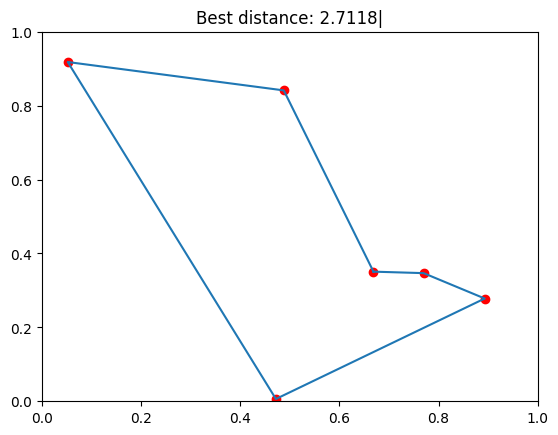

In [13]:

N = 6
np.random.seed(404)
cities = np.random.rand(N, 2)

def total_distance(path):
    return sum(np.linalg.norm(cities[path[i]] - cities[path[i+1]]) for i in range(len(path)-1)) + np.linalg.norm(cities[path[-1]] - cities[path[0]])

all_tours = [ (0,) + p for p in itertools.permutations(range(1, N)) if p[0] < p[-1] ]

fig, ax = plt.subplots()
scat = ax.scatter(cities[:, 0], cities[:, 1], c='red')
line, = ax.plot([], [], 'b-', lw=2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

best_path = []
best_dist = float('inf')

def update(frame):
    global best_path, best_dist
    path = all_tours[frame]
    dist = total_distance(path)
    if dist < best_dist:
        best_path = path
        best_dist = dist
    path_coords = cities[list(path) + [path[0]]]
    line.set_data(path_coords[:, 0], path_coords[:, 1])
    ax.set_title(f"Path {frame+1}/{len(all_tours)}  | Current: {dist:.4f}")
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(all_tours), interval=300, repeat=False)
plt.close(fig)


display(HTML(ani.to_html5_video()))
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

    

ax.set_title(f"Best distance: {best_dist:.4f}|")
path_coords = np.vstack([cities[list(best_path) + [best_path[0]]]])
ax.scatter(cities[:, 0], cities[:, 1], c='red')
ax.plot(path_coords[:, 0], path_coords[:, 1])



nearest_neighbor_animation(404,6)


Vergleicht man die drei Lösungen, sieht man ,dass die optimale Lösung am besten ist (obviously) gefolgt von der **Greedy-Methode** und dem **Nearest-Neighbor-Algorithmus**. Doch wie nah kommen diese heuristischen Algorithmen eigentlich an die optimale Lösung heran?

In [14]:

greedy_tsp(404,6)

## **Verifikation der Optimalität beim TSP und Vergleich mit unteren Schranken**

### **Verifikation der Optimalität**

Beim **Travelling Salesman Problem (TSP)** zu überprüfen, ob eine gefundene Lösung tatsächlich **optimal** ist, grundsätzlich möglich aber nur dann, wenn die optimale Lösung bekannt ist. In der Praxis ist das selten der Fall, da das TSP ein **NP-schweres Problem** ist. Exakte Lösungen sind für grosse Instanzen kaum berechenbar, da der Rechenaufwand mit der Anzahl der Städte **exponentiell wächst**.

Für **kleine Instanzen** kann man durch **Brute-Force**-Methoden alle möglichen Rundreisen durchrechnen und somit die optimale Lösung bestimmen. Das ist jedoch nur für sehr wenige Städte praktikabel.

---

### **Problem der fehlenden optimalen Lösung**

Gerade bei praxisrelevanten, grösseren Instanzen ist die optimale Lösung meistens **unbekannt**. In solchen Fällen nutzt man anstelle des Vergleichs mit der optimalen Lösung sogenannte **untere Schranken** (*Lower Bounds*), um die Qualität einer gefundenen Lösung einzuschätzen.

---

## **Untere Schranken für das TSP**

### **1. Minimaler Spannbaum (MST) mit Prim’s Algorithmus**

Ein **Minimaler Spannbaum (Minimum Spanning Tree, MST)** ist eine **untere Schranke** für das TSP. Der MST kann z.b mit dem **greedy Algorithmus von Prim** berechnet werden. Dieser Algorithmus liefert eine optimale Lösung für das MST-Problem.

**Warum ist ein MST eine untere Schranke für das TSP?**

- Jede TSP-Tour enthält eine Verbindung zwischen allen Knoten (ohne Zyklen wäre es ein Baum).
- Wenn man aus einer TSP-Tour eine Kante entfernt, erhält man einen Spannbaum.
- Da der MST die minimale Summe aller Kanten zur Verbindung der Knoten hat, kann er **niemals länger** sein als eine TSP-Tour.
- Deshalb ist der Wert des MST eine **garantierte untere Schranke** für das TSP.

---

### **2. Verbesserte Schranke: Der 1-Tree**

Eine **bessere untere Schranke** als der MST ergibt sich durch den sogenannten **1-Tree**. Die Idee: 

> Entferne einen beliebigen Knoten aus dem Graphen, berechne den MST auf dem Rest, und füge anschliessend die **zwei kürzesten Kanten** vom entfernten Knoten wieder hinzu.

---

#### **Definition: 1-Tree Bound**

Gegeben eine Instanz $(V, d)$, berechnet man den 1-Tree Bound wie folgt:

1. Wähle einen beliebigen Knoten $v_0 \in V$.
2. Berechne die Länge $r$ des MST $R^*$ auf dem reduzierten Graphen $V \setminus \{v_0\}$.
3. Finde die Summe $s$ der **zwei billigsten Kanten** zwischen $v_0$ und den verbleibenden Knoten:

   $$
   s = \min\{d(v_0, x) + d(v_0, y) \mid x, y \in V \setminus \{v_0\}, x \ne y\}
   $$

4. Setze die untere Schranke $t := r + s$.

**Begründung:**

Jede gültige TSP-Tour muss zwei Kanten enthalten, die von $v_0$ ausgehen. Wenn man diese zwei Kanten entfernt, bleibt ein Spannbaum über $V \setminus \{v_0\}$ übrig. Daraus folgt:

$$
\ell(T) = d(e) + d(f) + \ell(R) \ge s + \ell(R^*) = t
$$

Somit ist $t$ eine **gültige untere Schranke** für das TSP.

> Typischerweise liegt der 1-Tree Bound etwa **10 % unter der optimalen Tourlänge** $\ell_{\text{opt}}$.

---

### **Zusammenfassung: Vergleich der unteren Schranken**

| Methode         | Idee                                                                 | Vorteil                              | Qualität der Schranke      |
|-----------------|----------------------------------------------------------------------|--------------------------------------|----------------------------|
| MST             | Spannbaum über alle Knoten                                           | Einfach und effizient zu berechnen   | Schwächer                  |
| 1-Tree          | MST auf $V \setminus \{v_0\}$, plus 2 kürzeste Kanten von $v_0$      | Bessere Näherung an TSP-Optimum      | Typisch 10 % unter Optimum |



In [15]:

def prims_mst_animation(N):
    points = np.random.rand(N, 2)
    dist_matrix = np.linalg.norm(points[:, np.newaxis] - points[np.newaxis, :], axis=2)

    visited = set([0])
    edges = []
    frames = []

    while len(visited) < N:

        possible_edges = [
            (i, j, dist_matrix[i][j])
            for i in visited for j in range(N) if j not in visited
        ]

        i, j, d = min(possible_edges, key=lambda x: x[2])
        edges.append((i, j))
        visited.add(j)
        frames.append(edges.copy())

    fig, ax = plt.subplots()
    ax.scatter(points[:, 0], points[:, 1], c='red')
    lines = []

    for _ in range(N-1): 
        line, = ax.plot([], [], 'b-', lw=2)
        lines.append(line)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    def update(frame):
        for idx, (i, j) in enumerate(frame):
            lines[idx].set_data([points[i][0], points[j][0]], [points[i][1], points[j][1]])
        ax.set_title(f"Prim's MST | Step {len(frame)}/{N-1}")
        return lines

    ani = animation.FuncAnimation(fig, update, frames=frames, interval=600, repeat=False)
    plt.close(fig)
    return HTML(ani.to_html5_video())


prims_mst_animation(6)


In [16]:
#finds the max one tree perfect for lower bound
def analyze_all_ignored_vertices(N):
    np.random.seed(404)
    points = np.random.rand(N, 2)
    dist_matrix = np.linalg.norm(points[:, np.newaxis] - points[np.newaxis, :], axis=2)

    all_results = []

    for ignored_vertex in range(N):
        remaining = [i for i in range(N) if i != ignored_vertex]
        visited = set([remaining[0]])
        edges = []

        while len(visited) < len(remaining):
            candidate_edges = [
                (u, v, dist_matrix[u][v])
                for u in visited
                for v in remaining
                if v not in visited
            ]
            u, v, w = min(candidate_edges, key=lambda x: x[2])
            edges.append((u, v, w))
            visited.add(v)


        reconnect = sorted(
            [(ignored_vertex, i, dist_matrix[ignored_vertex][i]) for i in remaining],
            key=lambda x: x[2]
        )[:2]

        edges += reconnect

        total_weight = sum(w for _, _, w in edges)
        heaviest_edge = max(edges, key=lambda x: x[2])

        all_results.append({
            'ignored_vertex': ignored_vertex,
            'total_weight': total_weight,
            'heaviest_edge': heaviest_edge,
            'edges': edges,
        })


    best = max(all_results, key=lambda r: r['total_weight'])  
    print(best['total_weight'])
    return animate_tree(points, best['edges'], best['ignored_vertex'], best['total_weight'], best['heaviest_edge'])

def animate_tree(points, edges, ignored_vertex, total_weight, max_edge):
    fig, ax = plt.subplots()
    ax.scatter(points[:, 0], points[:, 1], c='red')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    lines = []

    frames = []
    for i in range(1, len(edges) + 1):
        frames.append(edges[:i])

    def update(frame):
        for l in lines:
            l.remove()
        lines.clear()

        for u, v, w in frame:
            color = 'blue'
            lw = 2
            if (u, v) == max_edge[:2] or (v, u) == max_edge[:2]:
                lw = 3
            line, = ax.plot([points[u][0], points[v][0]], [points[u][1], points[v][1]], color=color, lw=lw)
            lines.append(line)

        if len(frame) == len(edges):
            ax.set_title(f"Ignored Vertex: {ignored_vertex} | Total Weight: {total_weight:.4f}")
        else:
            ax.set_title(f"Step {len(frame)}/{len(edges)}")
        return lines

    ani = animation.FuncAnimation(fig, update, frames=frames, interval=500, repeat=False)
    plt.close(fig)
    return HTML(ani.to_html5_video())


analyze_all_ignored_vertices(6)


2.441381533189343


### Vergleich der Tourlängen und Annäherung an die untere Schranke

In unserem Beispiel (mit 6 Knoten und Zufalls-Seed 404) ergaben sich folgende Tourlängen:

- **Optimale Lösung**: $2.7118$  
- **Nearest Neighbor**: $2.8581$  
- **Greedy**: $2.7784$  




Wir betrachten nun das Verhältnis der heuristischen Tourlängen zur unteren Schranke:
- **1-Tree Lower Bound** (untere Schranke): $2.4413$  
- **Nearest Neighbor**:  
  $\frac{2.8581}{2.4413} \approx 1.17$  
  → Das bedeutet, die Nearest-Neighbor-Lösung ist etwa **17 % schlechter** als die untere Schranke.  
  Obwohl dieses Verhältnis von der Struktur und Grösse des TSP-Problems abhängt, wird ein durchschnittlicher Faktor von **ca. 1.25** häufig in der Literatur genannt.

- **Greedy**:  
  $\frac{2.7784}{2.4413} \approx 1.13$  
  → Die Greedy-Lösung liegt etwa **13 % schlechter** der unteren Schranke. Hier liegt der Durchschnitt bei  1.17 



---

# Christofides-Algorithmus für das metrische TSP

Der Christofides-Algorithmus, vorgestellt im Jahr 1976, ist ein eleganter Approximationsalgorithmus für das metrische Traveling Salesman Problem (TSP). Er garantiert, dass die Kosten der resultierenden Tour höchstens das $1{,}5$-Fache der Kosten des optimalen TSP-Zyklus betragen. Diese Garantie ist seit fast 50 Jahren der beste bekannte Approximationsfaktor für das metrische TSP.

## Grundidee

Der Christofides-Algorithmus basiert auf der Intuition, dass ein **Minimaler Spannbaum (MST)** strukturell dem optimalen TSP-Zyklus ähnelt. Er kombiniert drei zentrale graphentheoretische Komponenten:

1. Minimaler Spannbaum (MST)
2. Perfektes Matching auf den Knoten ungeraden Grades
3. Eulertour (ein Zyklus, der jede Kante genau einmal besucht)

Diese Komponenten garantieren, dass das Ergebnis ein Hamiltonkreis ist (jeder Knoten wird genau einmal besucht) und innerhalb einer beweisbaren Kostengrenze bleibt.

## Zentrale Konzepte

### Perfektes Matching

Ein perfektes Matching ist eine Kantenmenge, bei der jeder Knoten genau einmal beteiligt ist. Im Christofides-Algorithmus wird ein **Matching minimalen Gewichts** (Minimum Weight Perfect Matching, MWPM) auf den ungeraden Knoten des MST berechnet, um einen eulersch zusammenhängenden Graphen zu erhalten.

### Handshaking Lemma

Das Handshaking Lemma besagt, dass die Summe aller Knotengrade in einem Graphen gerade ist. Daher ist die Anzahl der Knoten ungeraden Grades stets gerade ein perfektes Matching ist also immer möglich.

## Schritte des Christofides-Algorithmus

**Schritt 1: Konstruktion eines minimalen Spannbaums (MST)**  
Gegeben sei ein vollständiger Graph $G = (V, E)$ mit Kantengewichten, die die Dreiecksungleichung erfüllen. Berechne einen minimalen Spannbaum $T = (V, F)$.

**Schritt 2: Bestimme die Knoten ungeraden Grades**  
Finde die Menge $U \subseteq V$ aller Knoten mit ungeradem Grad im MST.

**Schritt 3: Finde ein perfektes Matching minimalen Gewichts**  
Finde ein perfektes Matching $J$ auf den Knoten $U$, das das Gesamtgewicht minimiert.

**Schritt 4: Kombiniere MST und Matching**  
Erstelle einen Multigraphen $T' = (V, F \cup J)$. Da nun alle Knoten geraden Grad haben, ist der Graph eulersch.

**Schritt 5: Finde eine Eulertour**  
Berechne eine Eulertour $C$ in $T'$, die jede Kante genau einmal besucht.

**Schritt 6: Verwandle die Eulertour in einen Hamiltonkreis**  
„Abkürzen“ der Eulertour $C$ durch Überspringen bereits besuchter Knoten. Die Dreiecksungleichung stellt sicher, dass die Gesamtkosten dadurch nicht steigen. Der resultierende Zyklus $C'$ ist ein gültiger Hamiltonkreis.

## Approximationsgarantie

Christofides’ Algorithmus garantiert:

$$
\text{Kosten}(C') \leq \frac{3}{2} \cdot \text{OPT}
$$

Dabei ist:

- $C'$ der vom Algorithmus erzeugte Hamiltonkreis,
- $\text{OPT}$ die optimalen (evtl. unberechenbaren) TSP-Kosten.

## Können wir besser sein?

Über Jahrzehnte galt der Faktor $\frac{3}{2}$ als unverbesserlich. Doch ein Durchbruch im Jahr 2020 zeigte, dass eine Approximation mit Faktor $\frac{3}{2} - \varepsilon$ (für ein $\varepsilon > 10^{-36}$) durch Randomisierung möglich ist. Dieser Beweis wurde 2021 auf der STOC-Konferenz präsentiert und als „Best Paper“ ausgezeichnet. Das zeigt: Die $1{,}5$-Grenze ist nicht absolut Verbesserungen sind denkbar.

## Zeitkomplexität
- **Berechnung des minimalen Spannbaums (Prim-Algorithmus):**  
  Benötigt $O(E \log V)$ Zeit, wobei $E$ die Anzahl der Kanten und $V$ die Anzahl der Knoten ist.

- **Bestimmen der Knoten mit ungeradem Grad:**  
  Durchläuft die Kanten des Spannbaums und zählt den Grad jedes Knotens.  
  Benötigt $O(V)$ Zeit.

- **Minimumgewichtige Paarung der ungeraden Knoten:**  
  Benötigt $O(V^2)$ Zeit.

- **Konstruktion des eulerschen Zyklus:**  
  Basierend auf dem MST und den hinzugefügten Kanten aus der Paarung.  
  Benötigt $O(V + E)$ Zeit.

- **Erzeugung des hamiltonschen Pfades aus dem eulerschen Zyklus:**  
  Benötigt $O(V)$ Zeit.

### Gesamte Zeitkomplexität

Die Gesamtheit der Schritte ergibt:

$$
O(E \log V + V + V^2 + V + E + V) = O(E \log V + V^2)
$$

### Spezialfall: Vollständiger Graph

Für einen vollständigen Graphen (hier der Fall) gilt:

$$
E = \frac{V(V - 1)}{2}
$$

Im schlimmsten Fall ergibt sich somit:

$$
O(V^2 \log V)
$$

für simulation von Christofides-Algorithmus: https://alon.kr/posts/christofides


## Tour-Verbesserungen

Sobald eine erste Tour erstellt wurde (z.b durch den Christofides-Algorithmus, die Nearest-Neighbor-Heuristik, eine gierige Heuristik usw.), kann man einfache Transformationen anwenden, um zu prüfen, ob es eine bessere Lösung gibt. Diese Methoden gehören zur **lokalen Suchoptimierung**.

### Zufälliges Tauschen (Random Swapping)

- Wähle zwei zufällige Städte in der Tour und tausche ihre Positionen.
- Wiederhole dies mehrfach und behalte nur die Tour, wenn sich die Gesamtkosten verbessern.
- Ziel ist es herauszufinden, ob zufällige Vertauschungen zu einer kürzeren oder effizienteren Tour führen können.

### 2-opt-Optimierung

- Wähle zwei nicht benachbarte Kanten in der Tour und verbinde sie auf die einzige andere sinnvolle Weise neu (d. h. entferne zwei Kanten und schließe den Pfad anders wieder).
- Wenn diese neue Verbindung zu einer kürzeren Tour führt, wird sie übernommen.
- Wiederhole diesen Vorgang, bis keine weitere Verbesserung gefunden werden kann das Ergebnis ist eine **2-opt-optimale** Tour.

### 3-opt und k-opt

- Funktioniert ähnlich wie 2-opt, aber es werden mehr Kanten entfernt und auf neue Weise wieder verbunden.
- Bei **k-opt** entfernt man *k* Kanten und verbindet sie so neu, dass wieder eine gültige Tour entsteht.
- Je größer *k*, desto höher die Wahrscheinlichkeit, eine bessere Tour zu finden aber auch der Rechenaufwand steigt deutlich.

### Einschränkungen

- Diese Methoden sind **heuristisch** sie können Lösungen stark verbessern, garantieren aber **nicht das globale Optimum**.
- Sie können in lokalen Minima stecken bleiben, insbesondere bei kleinen *k* oder begrenzter Anzahl an Versuchen.


Das TSP ist ein extrem interessantes Problem, das auch heute noch intensiv erforscht wird. Alternativ lässt es sich auch in Varianten wie dem „Traveling Salesman Trolley Problem“ modellieren.

<img src="2.png" style="width:800px;">

## Quellenverzeichnis

1. WsCube Tech. (o. J.). *Travelling Salesman Problem*. WsCube Tech.  
   https://www.wscubetech.com/resources/dsa/travelling-salesman-problem

2. CompGeek. (o. J.). *Christofides-Algorithmus – Approximationsalgorithmus für das TSP*.  
   https://compgeek.co.in/christofides-algorithm/

3. Alon. (o. J.). *Christofides’ Algorithmus*.  
   https://alon.kr/posts/christofides

4. Institut de Mathématiques de Jussieu-Paris Rive Gauche. (2000). *ITA_2000__34_3_173_0*.  
   https://www.numdam.org/article/ITA_2000__34_3_173_0.pdf

5. Cook, W. (2015). *The Traveling Salesman Problem*. MIT Mathematics.  
   https://math.mit.edu/~goemans/18433S15/TSP-CookCPS.pdf

6. Aswani, A. (2013). *Vorlesungsfolien: IEOR 151 – Lektion 17*. UC Berkeley.  
   https://aswani.ieor.berkeley.edu/teaching/FA13/151/lecture_notes/ieor151_lec17.pdf

7. Johnson, D. S., & McGeoch, L. A. (1997). *The Traveling Salesman Problem: A Case Study*.  
   https://www.cs.ubc.ca/~hutter/previous-earg/EmpAlgReadingGroup/TSP-JohMcg97.pdf

8. Yudkowsky, E. (2016, 16. August). *Travelling Salesman Problem – Approximationsalgorithmus | Christofides Algorithmus* [Video]. YouTube.  
   https://www.youtube.com/watch?v=GiDsjIBOVoA&t=419s

9. Buchanan, A. L. (o. J.). *TSP_VRP*. GitHub.  
   https://github.com/AustinLBuchanan/TSP_VRP


---

##  Verwendete Tools

- **GPT-4o** (OpenAI, 2025): Genutzt zur Textkorrektur, Markdown-Formatierung und Vereinfachung von Python-Code.
- **Perplexity** (2025): Genutzt zur Informationssuche und Klärung von Inhalten.
- **GitHub Copilot** (2025): Verwendet zur Unterstützung bei der Erstellung und Optimierung von Python-Codebeispielen.
